<a href="https://colab.research.google.com/github/AriadnaVazquez/Metodos-Numericos-I/blob/main/Polinomio%20Interpolante%20de%20Lagrange%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las bibliotecas necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def interpolacion_lagrange(datos):
    """
    Calcular el polinomio de interpolación de Lagrange para un conjunto de puntos.

    Args:
        datos (list of tuples): Lista de puntos (x, y) donde 'x' es la coordenada en X y 'y' es la coordenada en Y.

    Returns:
        sp.Expr: Polinomio de interpolación en forma simbólica.
    """
    # Definir la variable simbólica
    x = sp.Symbol('x')

    # Inicializar el polinomio
    polinomio = 0

    # Construir el polinomio de Lagrange
    for i in range(len(datos)):
        xi, yi = datos[i]  # Punto actual (xi, yi)
        # Calcular el término L_i(x)
        Li = 1
        for j in range(len(datos)):
            if i != j:
                xj, _ = datos[j]
                Li *= (x - xj) / (xi - xj)
        # Sumar el término al polinomio
        polinomio += yi * Li

    # Simplificar el polinomio
    return sp.simplify(polinomio)

In [4]:
def graficar_polinomio(datos, polinomio):
    """
    Graficar el polinomio de interpolación y los puntos originales.

    Args:
        datos (list of tuples): Lista de puntos (x, y) donde 'x' es la coordenada en X y 'y' es la coordenada en Y.
        polinomio (sp.Expr): Polinomio de interpolación en forma simbólica.
    """
    # Convertir el polinomio simbólico a una función numérica
    x = sp.Symbol('x')
    poly_func = sp.lambdify(x, polinomio, modules=['numpy'])

    # Extraer los puntos de los datos
    x_data = [p[0] for p in datos]
    y_data = [p[1] for p in datos]

    # Crear un rango de valores de x para graficar el polinomio
    x_vals = np.linspace(min(x_data) - 1, max(x_data) + 1, 500)
    y_vals = poly_func(x_vals)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Polinomio de Lagrange', color='blue', lw=2)
    plt.scatter(x_data, y_data, color='purple', label='Puntos originales', zorder=5, s=50)
    plt.title('Gráfica de interpolación de Lagrange', fontsize=14)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

Datos de entrada:
Punto 1: (x=0, y=1)
Punto 2: (x=1, y=3)
Punto 3: (x=2, y=2)
Punto 4: (x=3, y=5)

Polinomio de interpolación de Lagrange:
7*x**3/6 - 5*x**2 + 35*x/6 + 1


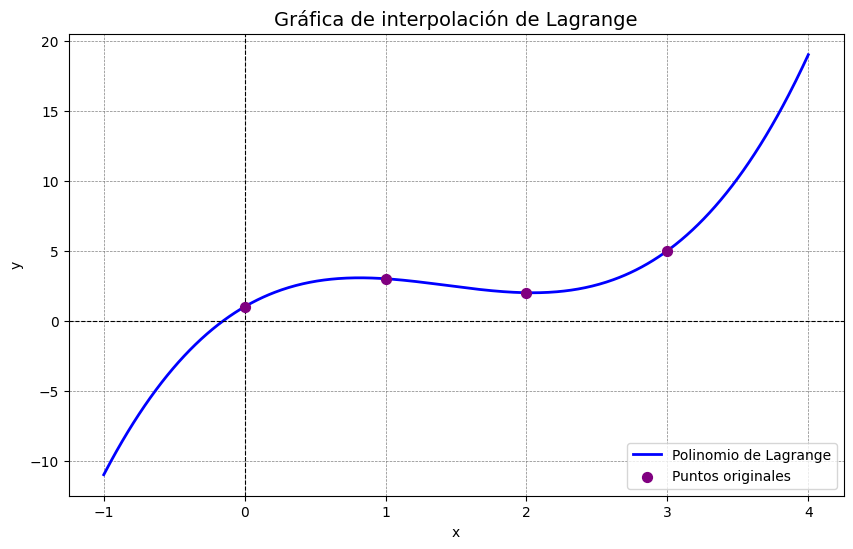

In [5]:
# Ejemplo de uso
if __name__ == "__main__":
    # Datos de ejemplo proporcionados por el usuario
    datos = [(0, 1), (1, 3), (2, 2), (3, 5)]

    # Mostrar los datos de entrada
    print("Datos de entrada:")
    for i, (xi, yi) in enumerate(datos):
        print(f"Punto {i + 1}: (x={xi}, y={yi})")

    # Calcular el polinomio de interpolación de Lagrange
    polinomio = interpolacion_lagrange(datos)
    print("\nPolinomio de interpolación de Lagrange:")
    print(polinomio)

    # Graficar el polinomio y los puntos originales
    graficar_polinomio(datos, polinomio)